# This Notebook...
... loads data from "data_raw.csv", and then produces a number of figures that are used in the final report.

# Dependencies

In [1]:
import pandas as pd
import numpy as np

import time

from matplotlib import pyplot as plt

# Load Raw Data

In [6]:
df = pd.read_csv("data_raw.csv", index_col=0)
df

,review,voted_up,playtime,helpfulness,length
5,"hmmmmmmm map autism,",True,0.010670,0.521739,0.002625
23,So this is exactly the type of multiple month ...,False,0.054507,0.541985,0.112000
25,\nCross between '4X' and 'grand strategy'. Hi...,True,0.020136,0.523810,0.024500
28,"does not have a learning curve, but a learning...",False,0.000072,0.566929,0.049375
30,Largely a 4x game composed of fluff and expens...,False,0.046774,0.473713,0.006750
...,...,...,...,...,...
95224,The menu looks nice,True,0.001641,0.388136,0.002375
95225,Game of thrones in space!!!,True,0.000002,0.295665,0.003375
95226,https://www.youtube.com/watch?v=hvmcvfzHEjY\n\...,True,0.000481,0.718144,0.806625
95227,[h1]FULL VIDEO REVIEW:[/h1] https://youtu.be/i...,True,0.000834,0.652433,0.266125


(array([False,  True]), array([13122, 22526]))


Text(0.5, 23.52222222222222, 'Fig. 1B: Distribution of low vs high helpfulness')

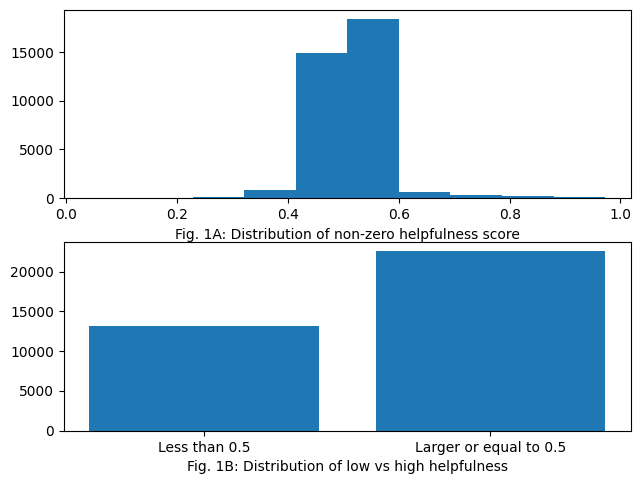

In [42]:
# What is the distribution of the weighted vote scores?

df["helpfulness"]

fig, axs = plt.subplots(nrows=2)
fig.tight_layout()
axs[0].hist(df["helpfulness"])
axs[0].set_xlabel("Fig. 1A: Distribution of non-zero helpfulness score")

counts = np.unique(df["helpfulness"] >= 0.5, return_counts=True)
print(counts)
axs[1].bar(x=counts[0], height=counts[1], tick_label=["Less than 0.5", "Larger or equal to 0.5"])
axs[1].set_xlabel("Fig. 1B: Distribution of low vs high helpfulness")

#axs[1].hist(df["helpfulness"])
#axs[1].set_xlabel("Distribution of weighted vote score")

#axs[2].hist(df[df["years_since"] > 8]["helpfulness"])
#axs[2].set_xlabel("Distribution of weighted vote score (for old reviews)")

In [94]:
df[df["weighted_vote_score"] > 0.5].shape

(22199, 18)

# Explore the data

# Show the weighted vote score for each week/month

Text(0.5, 23.52222222222222, 'Weighted vote score plotted against time since review')

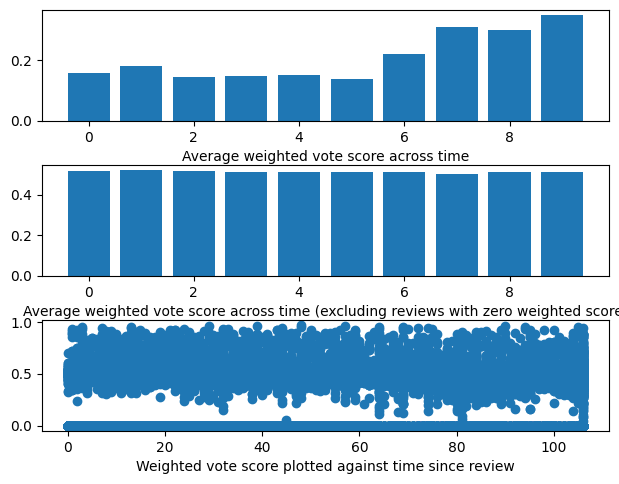

In [76]:
# Show the weighted vote score for each week

#time_jan14 = 1736843507.2121418 # The unix timestamp for 14 January 2025, roughly 09:32, just after the reviews were last obtained.

# Create column for the time since created
time_jan14 = 1736843507.2121418 # The unix timestamp for 14 January 2025, roughly 09:32, just after the reviews were last obtained.
df["seconds_since"] = time_jan14 - df["timestamp_created"] #Seconds since created

df_time_zeros = pd.DataFrame({"weight":df["weighted_vote_score"], "time":round(df["seconds_since"]/(3600*24*30*12))})
vals_zeros = df_time_zeros.groupby("time").mean()

df_time_no_zeroes = pd.DataFrame({"weight":df[df["weighted_vote_score"] != 0]["weighted_vote_score"], "time":round(df[df["weighted_vote_score"] != 0]["seconds_since"]/(3600*24*30*12))})
vals_no_zeros = df_time_no_zeroes.groupby("time").mean()

fig, axs = plt.subplots(nrows=3)
fig.tight_layout()
axs[0].bar(x=vals_zeros["weight"].index, height=vals_zeros["weight"])
axs[0].set_xlabel("Average weighted vote score across time")

axs[1].bar(x=vals_no_zeros["weight"].index, height=vals_no_zeros["weight"])
axs[1].set_xlabel("Average weighted vote score across time (excluding reviews with zero weighted score)")

axs[2].scatter(x=round(df["seconds_since"]/(3600*24*30)), y=df["weighted_vote_score"])
axs[2].set_xlabel("Weighted vote score plotted against time since review")

In [ ]:
df[df["weighted_vote_score"] != 0]["weighted_vote_score"].shape #59436 #35619

(35619,)

Text(0.5, 23.52222222222222, 'Number of reviews with non-zero weighted vote score across time')

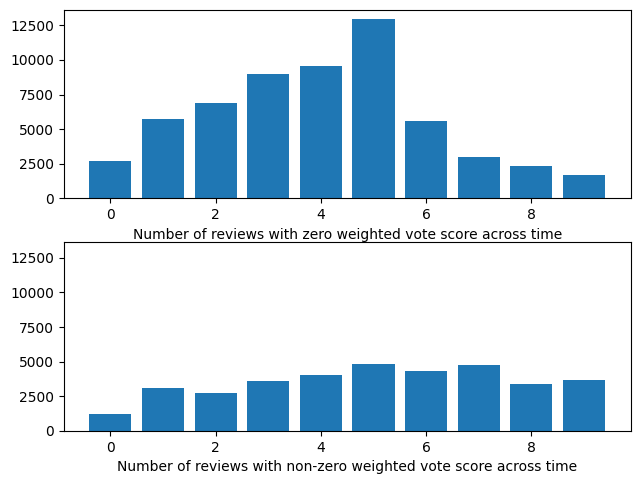

In [78]:
#df_time_zeros = pd.DataFrame({"weight":df[df["weighted_vote_score"] == 0]["weighted_vote_score"], "time":round(df[df["weighted_vote_score"] == 0]["seconds_since"]/(3600*24*30*12))})

df["years_since"] = round(df["seconds_since"]/(3600*24*30*12))

vals_zero = df[df["weighted_vote_score"] == 0].groupby(by="years_since").count()
vals_zero["Unnamed: 0"]

vals_nozero = df[df["weighted_vote_score"] != 0].groupby(by="years_since").count()
vals_nozero["Unnamed: 0"]

fig, axs = plt.subplots(nrows=2, sharey=True)
fig.tight_layout()
axs[0].bar(x=vals_zero["Unnamed: 0"].index, height=vals_zero["Unnamed: 0"])
axs[0].set_xlabel("Number of reviews with zero weighted vote score across time")

axs[1].bar(x=vals_nozero["Unnamed: 0"].index, height=vals_nozero["Unnamed: 0"])
axs[1].set_xlabel("Number of reviews with non-zero weighted vote score across time")

In [58]:
df[df["weighted_vote_score"] != 0].shape

(35619, 18)

In [9]:
np.unique(df[df["weighted_vote_score"] == 0][["review", "votes_up"]]["votes_up"])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [10]:
df["timestamp_created"]

0        1736571209
1        1727226633
2        1736568980
3        1736568249
4        1736568230
            ...    
95050    1462810353
95051    1462810229
95052    1462809610
95053    1462809557
95054    1462809600
Name: timestamp_created, Length: 95055, dtype: int64

<BarContainer object of 114 artists>

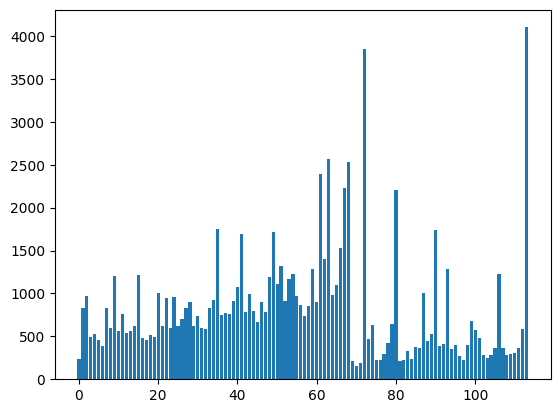

In [11]:
# Showing the number of reviews that were made each week

vals = np.unique(round((time.time() - df["timestamp_created"])/(3600*24*28)), return_counts=True)

fig, axs = plt.subplots(nrows=1)
axs.bar(x=vals[0], height=vals[1])

In [12]:
#df[df["votes_funny"] > 0]["votes_funny"]

np.unique(df["votes_funny"], return_counts=True)[0]


#list(df["votes_funny"]).index(max(df["votes_funny"]))

array([         0,          1,          2,          3,          4,
                5,          6,          7,          8,          9,
               10,         11,         12,         13,         14,
               15,         16,         17,         18,         19,
               20,         21,         22,         23,         24,
               25,         26,         27,         28,         29,
               30,         31,         32,         33,         34,
               35,         36,         37,         38,         39,
               40,         41,         42,         43,         44,
               45,         46,         47,         48,         49,
               50,         51,         52,         53,         55,
               56,         57,         58,         59,         60,
               61,         62,         63,         64,         65,
               66,         67,         68,         69,         70,
               71,         72,         73,         77,        

In [13]:
df[df["votes_up"] == 0]["review"]

0        Worth it, the game is very interactive, and if...
1                              horrible pricing great game
2        Generally a very good game and has a lot of po...
3        Given the number of hours I've put in id say i...
5                                             space racism
                               ...                        
95015    space pirates why do you have to be so op........
95017    >Attacked by Space pirate\n>ahh should be easy...
95020                           First impression is great!
95027    It is all you could want from a space game. Sc...
95034    Fantastic game. Very high ammounts of customiz...
Name: review, Length: 63770, dtype: object

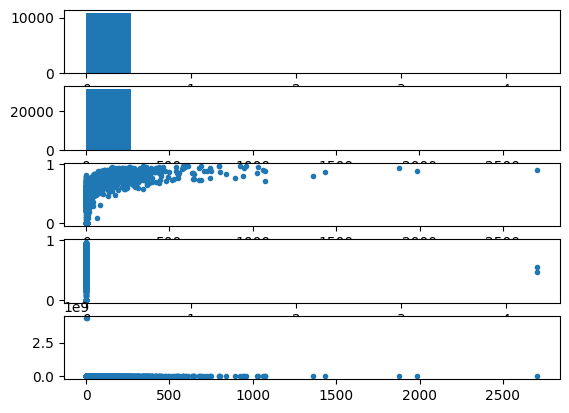

In [14]:
fig, axs = plt.subplots(nrows=5)
axs[0].hist(df[df["votes_funny"] > 0]["votes_funny"])
axs[1].hist(df[df["votes_up"] > 0]["votes_up"])
axs[2].plot(df["votes_up"], df["weighted_vote_score"], ".")
axs[3].plot(df["votes_funny"], df["weighted_vote_score"], ".")
axs[4].plot(df["votes_up"], df["votes_funny"], ".")

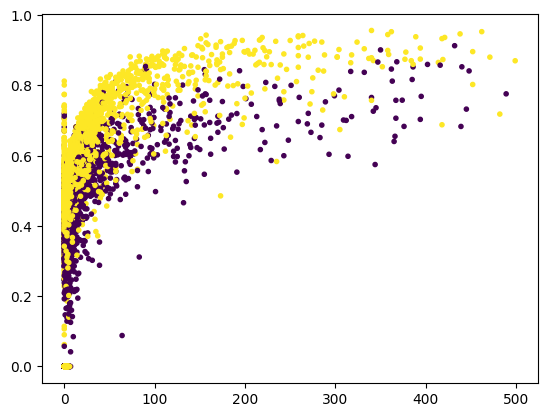

In [15]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=1)
axs.scatter(df[df["votes_up"] < 500]["votes_up"], df[df["votes_up"] < 500]["weighted_vote_score"], marker=".", c=df[df["votes_up"] < 500]["voted_up"])

This plot (scatter of weighted score vs upvotes) is interesting, because it tells us that there is some explanatory power in the recommendation (yes or no).

In [16]:
np.unique(df["weighted_vote_score"], return_counts=True)

(array([0.        , 0.04173409, 0.05753214, ..., 0.9630543 , 0.96318144,
        0.97223079], shape=(15143,)),
 array([59436,     1,     1, ...,     1,     1,     1], shape=(15143,)))

In [17]:
df["timestamp_created"]

0        1736571209
1        1727226633
2        1736568980
3        1736568249
4        1736568230
            ...    
95050    1462810353
95051    1462810229
95052    1462809610
95053    1462809557
95054    1462809600
Name: timestamp_created, Length: 95055, dtype: int64